In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
yf.pdr_override()

In [2]:
tickers = ['APN.JO','FSR.JO', 'IMP.JO','NTC.JO', 'RBP.JO', 'SSW.JO']

securities = ['Aspen','FirstRand', 'Impala Platinum', 'NetCare', 'Royal Bafokeng', 'Sibanye StillWater']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, start = '2007-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec_data.tail()

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2023-02-09 00:00:00+02:00,14811.0,6495.0,19597.0,1374.0,16337.0,4491.0
2023-02-10 00:00:00+02:00,14737.0,6426.0,19082.0,1375.0,16200.0,4324.0
2023-02-13 00:00:00+02:00,14866.0,6481.0,19688.0,1400.0,17108.0,4399.0
2023-02-14 00:00:00+02:00,14919.0,6554.0,19300.0,1406.0,16575.0,4355.0
2023-02-15 00:00:00+02:00,15031.5,6467.0,18562.0,1464.0,16100.0,4175.0


In [4]:
sec_returns = np.log(sec_data/sec_data.shift(1))

In [5]:
sec_returns

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2007-01-02 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03 00:00:00+02:00,-0.004612,-0.021869,-0.043909,-0.041658,NaN,NaN
2007-01-04 00:00:00+02:00,-0.014903,-0.026133,-0.051293,-0.022643,NaN,NaN
2007-01-05 00:00:00+02:00,0.000625,0.030729,-0.012496,-0.007663,NaN,NaN
2007-01-08 00:00:00+02:00,0.000312,0.018174,0.035240,0.022815,NaN,NaN
...,...,...,...,...,...,...
2023-02-09 00:00:00+02:00,0.000000,0.004630,-0.024348,0.000000,-0.010413,-0.018750
2023-02-10 00:00:00+02:00,-0.005009,-0.010680,-0.026631,0.000728,-0.008421,-0.037894
2023-02-13 00:00:00+02:00,0.008715,0.008523,0.031264,0.018019,0.054535,0.017196


In [6]:
print("The Average Security Returns of:")
for i in range(len(tickers)):
    ticker = tickers[i]
    sec_returns[ticker].mean()*250
    sec_returns[ticker].std()*250**0.5
    print(" "+tickers[i]+" is ",str(round(sec_returns[ticker].std()*250,2))+'%')

The Average Security Returns of:
 APN.JO is  5.42%
 FSR.JO is  5.12%
 IMP.JO is  8.02%
 NTC.JO is  4.58%
 RBP.JO is  7.29%
 SSW.JO is  9.87%


In [7]:
print("The Variance of:")    
for k in range(len(securities)):
    ticker = tickers[k]
    Sec_var = sec_returns[ticker].var()*250
    print("    "+securities[k]+" Security Returns is ",str(round(Sec_var,2))+'%')
    

The Variance of:
    Aspen Security Returns is  0.12%
    FirstRand Security Returns is  0.1%
    Impala Platinum Security Returns is  0.26%
    NetCare Security Returns is  0.08%
    Royal Bafokeng Security Returns is  0.21%
    Sibanye StillWater Security Returns is  0.39%


In [8]:
#Returns for all securities
sec_returns[['APN.JO','FSR.JO','IMP.JO','NTC.JO','RBP.JO','SSW.JO']].mean()*250
sec_returns[['APN.JO','FSR.JO','IMP.JO','NTC.JO','RBP.JO','SSW.JO']].std()*250**0.5

APN.JO    0.342685
FSR.JO    0.323767
IMP.JO    0.507241
NTC.JO    0.289828
RBP.JO    0.461104
SSW.JO    0.624370
dtype: float64

<AxesSubplot:>

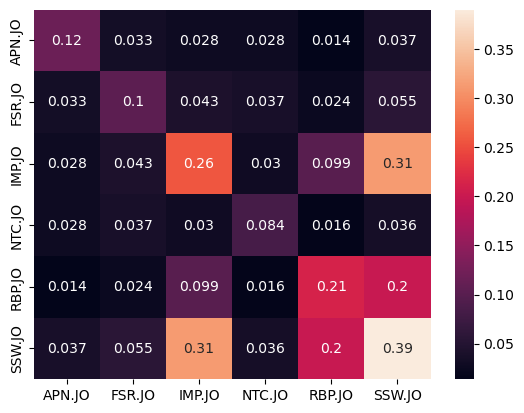

In [9]:
#Covariance Matrix
cov_matrix_a = sns.heatmap(sec_returns.cov()*250, annot=True)
cov_matrix_a

<AxesSubplot:>

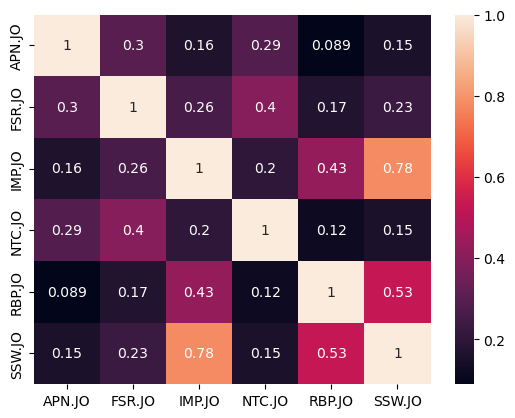

In [10]:
corr_matrix = sns.heatmap(sec_returns.corr(), annot=True)
corr_matrix

In [11]:
#Equal Weighting Scheme
weights = np.array([0.1321,0.0552,0.1376,0.0632,0.0895,0.1239])

In [12]:
#Portfolio Variance
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
print(str(round(pfolio_var,2)*100)+ '%')

4.0%


In [13]:
#Portfolio Votality
pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
print(str(round(pfolio_vol,2)*100)+ '%')

4.0%
